In [1]:
 # !pip install keras 

In [2]:
# !pip install tensorflow

In [2]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

###  Build a classification model for mnist dataset

In [3]:
# mnist.load_data()

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train/=255
x_test/=255

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train[0]

5

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
epochs = 5
batch_size = 1000
n_class = 10

### Model_Building

In [28]:
model = Sequential()
model.add(Dense(540,activation='relu',input_shape=(784,)))
model.add(Dense(370,activation='relu'))
model.add(Dense(n_class,activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 540)                 │         423,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 370)                 │         200,170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           3,710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 627,780 (2.39 MB)

 Trainable params: 627,780 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

### Model_compile

In [30]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

### Model_validation

In [31]:
history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7150 - loss: 0.9034 - val_accuracy: 0.9361 - val_loss: 0.2199
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9301 - loss: 0.2332 - val_accuracy: 0.9581 - val_loss: 0.1441
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9559 - loss: 0.1485 - val_accuracy: 0.9628 - val_loss: 0.1215
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9685 - loss: 0.1063 - val_accuracy: 0.9703 - val_loss: 0.0986
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9758 - loss: 0.0811 - val_accuracy: 0.9752 - val_loss: 0.0809


In [32]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9713 - loss: 0.0966


[0.08094204217195511, 0.9751999974250793]

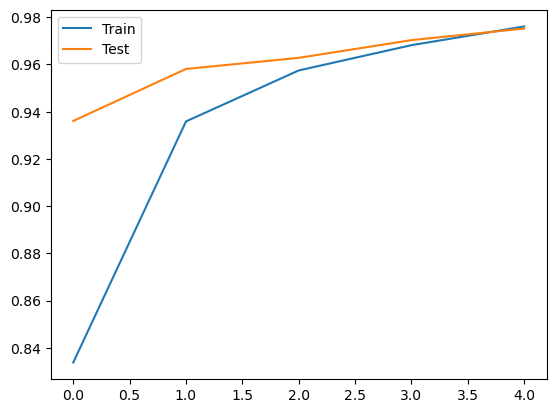

In [33]:
plt.plot(range(5),history.history['accuracy'],label='Train')
plt.plot(range(5),history.history['val_accuracy'],label='Test')
plt.legend()

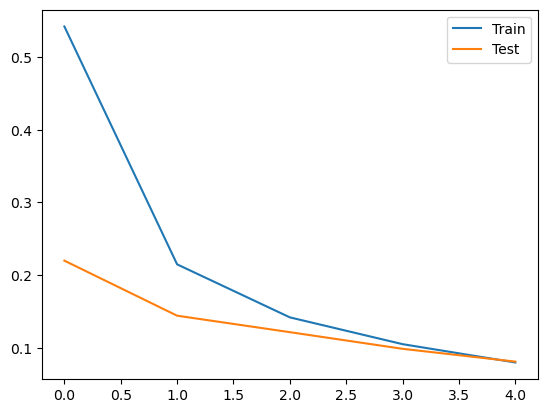

In [34]:
plt.plot(range(5),history.history['loss'],label='Train')
plt.plot(range(5),history.history['val_loss'],label='Test')
plt.legend()

In [35]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[2.3312839e-06, 5.7611092e-06, 3.5729815e-04, ..., 9.9939561e-01,
        4.0480072e-06, 2.7202899e-05],
       [2.1621975e-06, 6.3971494e-04, 9.9930155e-01, ..., 2.0740728e-08,
        5.0749345e-06, 2.8410244e-10],
       [2.0172381e-06, 9.9878448e-01, 3.0767245e-04, ..., 6.2395138e-04,
        7.0961796e-05, 8.9580271e-06],
       ...,
       [2.6878713e-09, 7.9934956e-08, 4.2498257e-08, ..., 1.4327578e-05,
        2.0502266e-06, 8.3926161e-06],
       [1.0766057e-06, 7.4751529e-07, 4.1173653e-08, ..., 3.8796668e-07,
        3.7781286e-04, 1.6405414e-08],
       [8.0783622e-07, 3.7939714e-08, 3.7725436e-06, ..., 1.1178823e-08,
        8.4202149e-08, 9.7377058e-09]], dtype=float32)